In [1]:
from utils import Logger
from pathlib import Path
import numpy as np
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
from time import sleep
%matplotlib inline

In [2]:
i = 0
recent_logfn = []
for fn in Path('./').iterdir():
    if fn.suffix == '.pkl':
        recent_logfn.append(fn)
recent_logfn

[PosixPath('RND.pkl'),
 PosixPath('AFSR+RND_1.5-1.9.pkl'),
 PosixPath('AFSR+RND_1.2-1.7.pkl')]

RND.pkl
Average  density_loss 4.0054157e-08
Average  policy_actor_loss -0.014027993
Average  policy_critic_loss 0.14709662
Average  internal_rewards 0.00016079880876124239
Average  norm_int_rew -0.5278244179889597
Average  external_rewards 0.0
AFSR+RND_1.5-1.9.pkl
Average  density_loss 4.643333e-08
Average  policy_actor_loss -1.92171
Average  policy_critic_loss 0.014876077
Average  encoder_loss 1.6369225
Average  internal_rewards 0.00022754711583946674
Average  norm_int_rew -0.22151741281981882
Average  external_rewards 0.0
AFSR+RND_1.2-1.7.pkl
Average  density_loss 6.709068e-08
Average  policy_actor_loss -0.0066579813
Average  policy_critic_loss 0.6319128
Average  encoder_loss 1.5760276
Average  internal_rewards 0.00019795762009157028
Average  norm_int_rew -0.34473981139239795
Average  external_rewards 0.0


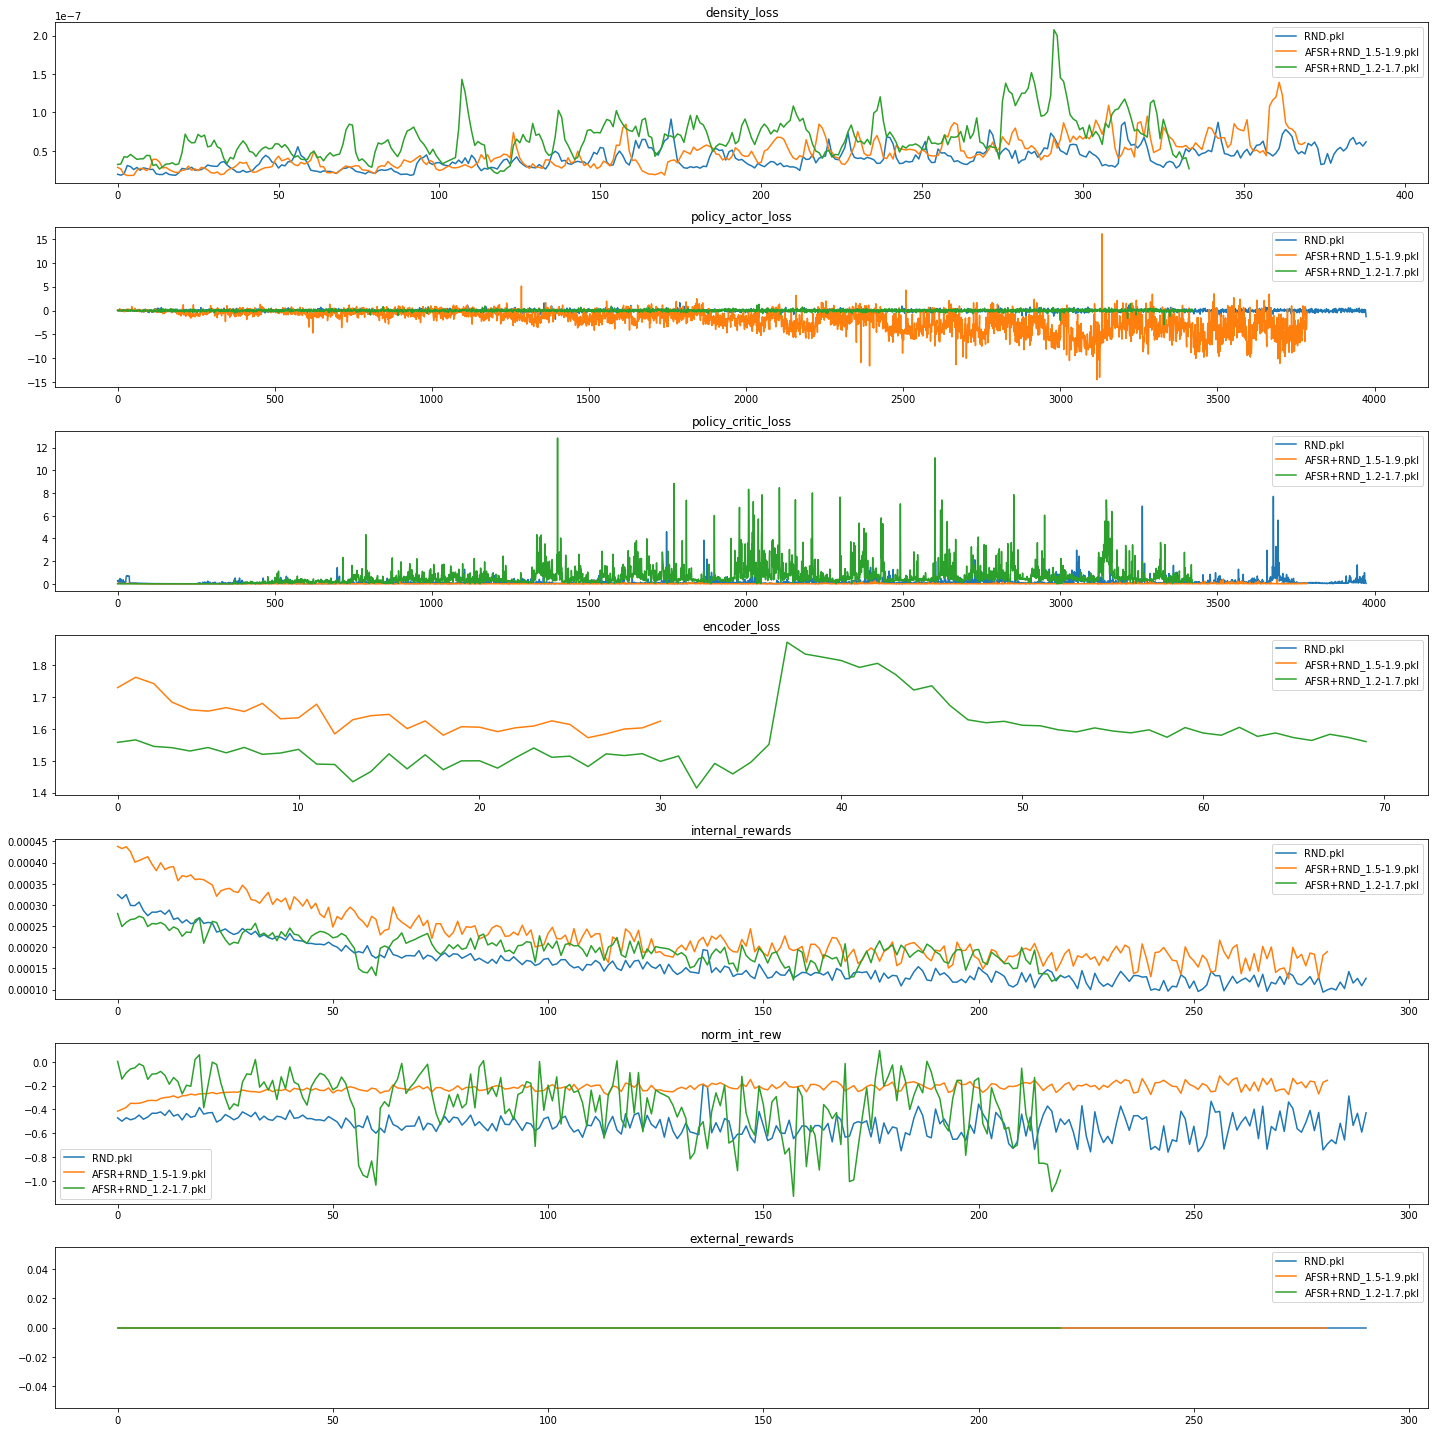

In [3]:
lgr = Logger(max_size=10000)
fig, axs = plt.subplots(7, 1)
fig.set_figheight(20)
fig.set_figwidth(20)

tmp_lgs = recent_logfn#[recent_logfn[1], recent_logfn[2], recent_logfn[-1]]
titles = ['density_loss', 'policy_actor_loss', 'policy_critic_loss', 'encoder_loss', 'internal_rewards', 'norm_int_rew', 'external_rewards']
fn = tmp_lgs[i%len(tmp_lgs)]
for fn in tmp_lgs:
    print(fn)
    lgr.import_logs(str(fn))
    logs = [lgr.logs['density']['loss'], 
            lgr.logs['policy']['actor_loss'], 
            lgr.logs['policy']['critic_loss'], 
            lgr.logs['encoder']['loss'],
            lgr.logs['env']['int_rewards'],
            lgr.logs['env']['norm_int_rew'],
            lgr.logs['env']['ext_rewards']]
    for title, log, ax in zip(titles, logs, axs):
        if title in ['density_loss', 'internal_rewards', 'external_rewards', 'encoder_loss', 'norm_int_rew']: 
            init_log = []
            for l in log:
                if np.array(l).shape == (): init_log.append(l)
                else: init_log = np.concatenate((init_log, l))
            new_log = []
            bs = 10 if title == 'density_loss' else 200
            for i in range(0, len(init_log), bs):
                new_log.append(np.mean(init_log[i:i+bs]))
            log = new_log
        if len(log) > 0: 
            print("Average ", title, np.mean(np.array(log[10:])))
        ax.plot(log[10:],label=str(fn))
        ax.set_title(title)

for ax in axs: ax.legend()
fig.tight_layout()
plt.show()
i+=1